In [1]:
# necessary tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the dataset
data=pd.read_csv('Test_Sales_LinReg.csv')
data.head(10)

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.00,7.2
1,57.5,32.8,65.9,23.5,57.50,11.8
2,120.2,19.6,7.2,11.6,18.50,13.2
3,8.6,2.1,46.0,1.0,2.60,4.8
4,199.8,2.6,52.9,21.2,2.90,10.6
5,66.1,5.8,114.0,24.2,9.80,8.6
6,214.7,24.0,55.8,4.0,26.00,17.4
7,23.8,35.1,18.3,65.9,35.19,9.2
8,97.5,7.6,19.1,7.2,7.90,9.7
9,204.1,32.9,53.4,46.0,42.90,19.0


In [4]:
data.shape

(305, 6)

In [5]:
data.isnull()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
300,False,False,False,False,False,False
301,False,False,False,False,False,False
302,False,False,False,False,False,False
303,False,False,False,False,False,False


In [11]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [10]:
data['Republic']=data['Republic'].fillna(data['Republic'].mean())
data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())
data['TV9']=data['TV9'].fillna(data['TV9'].mean())
data['AajTak']=data['AajTak'].fillna(data['AajTak'].mean())

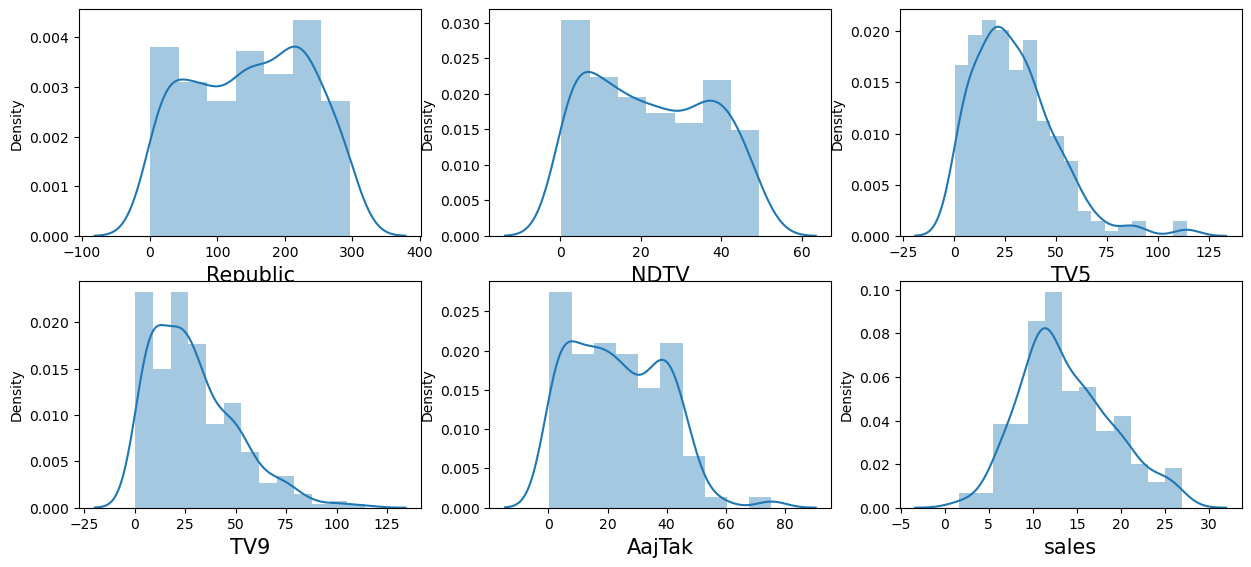

In [13]:
# distribustion of the dataset
plt.figure(figsize=(15,10))
plotnumber=1

for column in data:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [17]:
# let see the realtionship b/w features and labels
x=data.drop(columns=['sales']) # features
y=data['sales']# labels

In [30]:
x

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


In [19]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

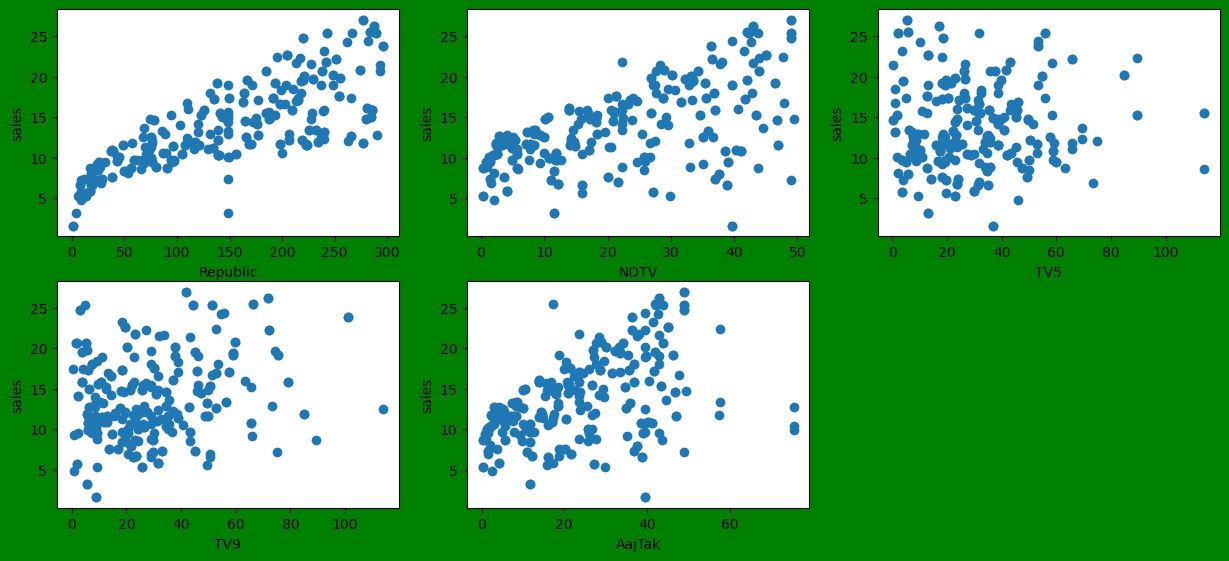

In [22]:
# by using scatter plot see the realtionship
plt.figure(figsize=(15,10),facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=6:
        plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize=10)
    plotnumber+=1
plt.show()

In [34]:
data.drop(columns=['AajTak','TV9','TV5'],inplace=True)
data

,Republic,NDTV,sales
0,8.7,48.9,7.2
1,57.5,32.8,11.8
2,120.2,19.6,13.2
3,8.6,2.1,4.8
4,199.8,2.6,10.6
...,...,...,...
300,286.0,13.9,15.9
301,18.7,12.1,6.7
302,39.5,41.1,10.8
303,75.5,10.8,9.9


In [37]:
#now standard scaler
new_x=data.drop(columns=['sales'])
new_y=data['sales']

In [42]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(new_x)
x_scaled

array([[-1.62625562e+00,  1.81463603e+00],
       [-1.05709897e+00,  7.14594359e-01],
       [-3.25825975e-01, -1.87303162e-01],
       [-1.62742193e+00, -1.38300063e+00],
       [ 6.02552502e-01, -1.34883785e+00],
       [-9.56796774e-01, -1.13019602e+00],
       [ 7.76331890e-01,  1.13329345e-01],
       [-1.45014363e+00,  8.71743170e-01],
       [-5.90577123e-01, -1.00721000e+00],
       [ 6.52703600e-01,  7.21426916e-01],
       [ 5.51235099e-01,  1.73264535e+00],
       [-9.36969595e-01,  9.74231524e-01],
       [ 1.55425707e+00,  1.17920823e+00],
       [-9.20641330e-01, -1.25810149e-01],
       [-9.75742305e-03,  1.06496788e-01],
       [ 8.19485161e-01,  3.66133953e-01],
       [ 1.04108304e+00, -1.17802392e+00],
       [-1.57377192e+00, -4.40107770e-01],
       [ 9.34949318e-01, -3.71782200e-01],
       [-1.00111635e+00, -6.65582150e-01],
       [ 1.33849072e+00, -1.28734484e+00],
       [-6.10748263e-02,  4.75454865e-01],
       [ 1.07257326e+00, -3.85447314e-01],
       [ 1.

# train Test split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.5,random_state=50)
y_train.head()

118     5.7
13     11.3
202     7.2
267    14.5
55     22.3
Name: sales, dtype: float64

In [45]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [46]:
data.tail(2)

,Republic,NDTV,sales
303,75.5,10.8,9.9
304,17.2,4.1,5.9


In [47]:
print('sales of the news channel:',regression.predict(scaler.transform([[75.5,10.8]])))

sales of the news channel: [8.54330469]


In [49]:
print('sales of the news channel:',regression.predict(scaler.transform([[17.2,4.1]])))

sales of the news channel: [4.64776722]


hence this News Channel dataset tells that if your parameter of news is lower sales will be lower other wise higher with higher parameters.

In [50]:
# now save this model
pickle.dump(regression,open('live_model','wb'))